![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [6]:
# Celda 1.3
bikes.groupby('hour')[[ "total"]].describe()

total                                                            
      count        mean         std   min     25%    50%     75%    max
hour                                                                   
0     455.0   55.138462   43.620012   2.0   24.00   41.0   74.50  283.0
1     454.0   33.859031   34.112105   1.0   11.00   19.0   46.00  168.0
2     448.0   22.899554   26.110267   1.0    5.00   11.0   32.00  119.0
3     433.0   11.757506   12.666442   1.0    3.00    6.0   15.00   66.0
4     442.0    6.407240    4.217633   1.0    3.00    6.0    9.00   28.0
5     452.0   19.767699   12.784293   1.0    8.00   19.0   29.00   57.0
6     455.0   76.259341   54.745333   1.0   24.50   75.0  118.00  213.0
7     455.0  213.116484  159.207044   1.0   63.00  208.0  334.00  596.0
8     455.0  362.769231  231.723065   8.0  133.50  392.0  563.50  839.0
9     455.0  221.780220   92.099209  14.0  161.00  217.0  294.50  414.0
10    455.0  175.092308  101.807629  17.0  106.00  149.0  218.50  539.0
11    455.0  210.674725  127.444294  10.0  123.00  183.0  265.50  647.0
12    456.0  256.508772  143.881880   3.0  157.00  234.5  332.00  757.0
13    456.0  257.787281  149.167185  11.0  154.00  226.5  329.00  729.0
14    456.0  243.442982  147.563199  12.0  144.00  212.0  311.25  730.0
15    456.0  254.298246  144.235670   7.0  154.00  232.0  331.00  724.0
16    456.0  316.372807  145.664786  11.0  211.75  309.5  421.00  783.0
17    456.0  468.765351  223.775485  15.0  277.00  480.5  608.50  970.0
18    456.0  430.859649  219.908138  23.0  240.75  422.5  564.00  977.0
19    456.0  315.278509  156.641732  11.0  190.00  312.5  416.00  743.0
20    456.0  228.517544  116.411565  11.0  136.75  224.0  302.00  551.0
21    456.0  173.370614   87.629319   6.0  103.50  171.5  230.00  584.0
22    456.0  133.576754   69.844495   9.0   80.00  129.0  175.00  502.0
23    456.0   89.508772   51.638004   4.0   52.75   80.0  123.00  256.0

In [7]:
# Celda 1.4
bikes.groupby('workingday')[[ "total"]].describe()

total                                                        
             count        mean         std  min   25%    50%    75%    max
workingday                                                                
0           3474.0  188.506621  173.724015  1.0  44.0  128.0  304.0  783.0
1           7412.0  193.011873  184.513659  1.0  41.0  151.0  277.0  977.0

Los códigos ejecutados en las celdas anteriores permiten ver el promedio de rentas por hora, junto con el máximo, mínimo y los percentiles de rentas. De esta manera se puede identificar las horas con mayor actividad de renta de bicicletas y las horas menos activas. También se puede observar esta información dependiendo si es un día laboral o un día festivo. Las 5 PM, las 6 PM y las 8 AM son las horas con mayor cantidad de rentas en promedio. Los días laorales en promedio se rentan mayor cantidad de bicicletas que los días festivos

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

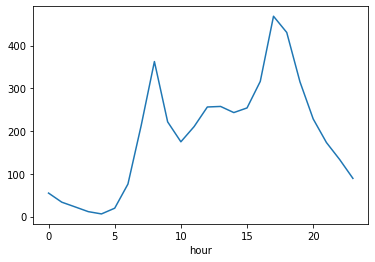

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

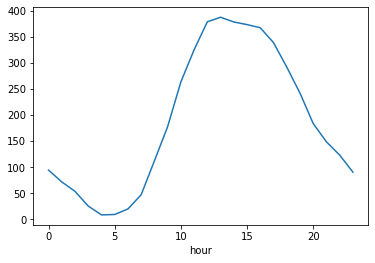

In [9]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes[bikes['workingday']==0].groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

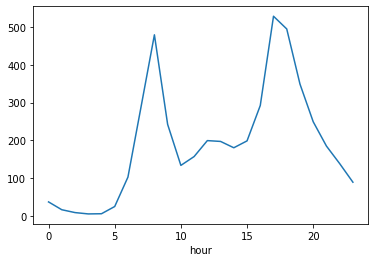

In [10]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes[bikes['workingday']==1].groupby('hour').total.mean().plot()

Durante los días laborales se presentan picos de rentas a las 8 de la mañana y a las 5 de la tarde. Esto puede ser el resultado de que muchas personas rentan bicicletas para desplazarse de su casa al trabajo o del trabajo a sus casas. Por otro lado, durante los días no laborales, la renta de bicicletas aumenta progresivamente desde las 5 AM hasta llegar al punto máximo de rentas aproximadamente al medio día. Resultado posiblemente de laos diferentes tipos de actividades que los individuos realizan en días no laborales.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [11]:
# Celda 3
lr = LinearRegression()
bikes_lite = bikes[['hour', 'workingday', 'total']]
x = bikes_lite[['hour', 'workingday']]
y = bikes_lite[['total']]

# Separar en set de entrenamiento y set de prueba
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
lr.fit(x_train.values, y_train.values)

lr_coeficientes = list(lr.coef_[0])
features = ['hour', 'workingday']
lr_features_df = pd.DataFrame(columns = ["Feature", "Coefficient"])
lr_features_df["Feature"] = features
lr_features_df["Coefficient"] = lr_coeficientes

display(lr_features_df)

,Feature,Coefficient
0,hour,10.608018
1,workingday,4.252345


1. **Interpretación de los coeficientes**: La variable hour tiene un coeficiente de 10.60. Esto significa que por cada hora adicional, el número estimado de rentas aumenta en ~10.5 y, si es un día laboral, el número estimado de rentas aumenta en ~4.
2. **Limitaciones**: La limitación para este caso particular es que las rentas promedio dependen linealmente de la variable **hour**. Por lo tanto, una funcion lineal no podrá capturar los valles y los picos presentados en la variable de respuesta de manera adecuada. Por ejemplo, después de la hora 18 el número de rentas empieza a bajar, sin embargo, de acuerdo a los coeficientes, por cada hora extra, el número de rentas estimado seguirá aumentando en aproximadamente 10.
3. **Desempeño del clasificador**:

In [12]:
from sklearn.metrics import mean_squared_error

print("R^2 test: {}".format(round(lr.score(x_test, y_test), 3)))

rmse = round(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))), 3)
print("Root Mean Squared Error: {}".format(rmse))

R^2 test: 0.147
Root Mean Squared Error: 167.304


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [17]:
# Celda 4
# Funciones de ayuda
def split_mse_func(x_col, y, split):
    filter_l = x_col < split
    
    # División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
    # y_l: la observación tiene un valor menor al punto de corte seleccionado
    # y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    # Calculate the predicted value for each split
    y_l_mean = np.mean(y_l)
    y_r_mean = np.mean(y_r)
    
    mse_l = [(y_l_mean-i)**2 for i in y_l.total]
    mse_r = [(y_r_mean-i)**2 for i in y_r.total]
    mse_split = float((sum(mse_l)+sum(mse_r))/(len(mse_l)+len(mse_r)))
    return mse_split**0.5


def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, np.inf]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = split_mse_func(X.iloc[:, j], y, split)
                        
            if gain < best_split[2]:
                best_split = [j, split, gain]
    
    return best_split


def tree_grow(X, y, level=0, ref_rmse = 9999999999, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(level=level, y_pred=float(y.iloc[:1].values[0]), split=-1, n_samples=1, rmse=0)
        return tree
    
    # Calcular la mejor división
    j, split, rMSE = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = float(y.mean() )
    
    tree = dict(level=level, y_pred=y_pred, split=-1, n_samples=X.shape[0], rmse=rMSE, end="-------------------")

    
    # Revisar el criterio de parada 
    if rMSE > ref_rmse:
        return tree
    
    if max_depth is not None:
        if level >= max_depth:
            return tree  
        
        
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, ref_rmse=rMSE, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, ref_rmse=rMSE, max_depth=max_depth, num_pct=num_pct)
    
    return tree



def tree_predict(X, tree):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        predicted = predicted * tree['y_pred']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'])
            predicted[~filter_l] = tree_predict(X_r, tree['sr'])

    return predicted


In [23]:
# Creación del árbol manual
manual_tree = tree_grow(x_train, y_train, level=0,ref_rmse = 9999999, max_depth=None, num_pct=10)

In [28]:
# Testear las predicciones
manual_predictions = tree_predict(x_test, manual_tree)
manual_predictions

array([259.61211009,  77.86470588, 259.61211009, ...,  24.98305085,
       259.61211009, 259.61211009])

In [29]:
# Evaluar el árbol manual
from sklearn.metrics import r2_score

r2_manual = r2_score(y_test, manual_predictions)
rmse_manual = round(np.sqrt(mean_squared_error(y_test, manual_predictions)), 3)

print("R^2 test Manual Tree: {}".format(r2_manual))
print("Root Mean Squared Error Manual Tree: {}".format(rmse_manual))

R^2 test Manual Tree: 0.3056900757460994
Root Mean Squared Error Manual Tree: 150.941


El R2 y el Root Mean Squared Error mejoraron ligeramente con respecto al modelo de regresión lineal.

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de clasificación y compare desempeño con el modelo del punto 3.

In [21]:
# Celda 5
tree=DecisionTreeRegressor(criterion="squared_error",max_depth=None,min_samples_split=2,min_samples_leaf=1,random_state=0)
tree.fit(x_train.values, y_train.values)

print("R^2 test: {}".format(round(tree.score(x_test, y_test), 3)))

rmse = round(np.sqrt(mean_squared_error(y_test, tree.predict(x_test))), 3)
print("Root Mean Squared Error: {}".format(rmse))

R^2 test: 0.64
Root Mean Squared Error: 108.697


El desempeño de este árbol construido con sklearn es significativamente mejor que el modelo lineal construido en el punto 3 y que el modelo de árbol de decisión construido manualmente en el punto 4.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir la cantidad de reacciones en redes sociales (popularidad) de la notica. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [30]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [33]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [34]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [35]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Iniciar los clasificadores
tree_class = DecisionTreeClassifier(max_depth=None,min_samples_split=2,min_samples_leaf=1,random_state=0)
log_reg = LogisticRegression(random_state = 0)

# Entrenar los clasificadores
tree_class.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Calcular la precisión de los clasificadores
from sklearn.metrics import accuracy_score
tree_class_acc = round(accuracy_score(y_true = y_test, y_pred = tree_class.predict(X_test)), 4)
log_reg_acc = round(accuracy_score(y_true = y_test, y_pred = log_reg.predict(X_test)), 4)

print(f"Decision Tree Classifier accuracy: {tree_class_acc}")
print(f"Logistic Regression Classifier accuracy: {log_reg_acc}")
print("")

# Calcular el F1-Score de los clasificadores
from sklearn.metrics import f1_score
tree_class_f1 = round(f1_score(y_true = y_test, y_pred = tree_class.predict(X_test)), 4)
log_reg_f1 = round(f1_score(y_true = y_test, y_pred = log_reg.predict(X_test)), 4)

print(f"Decision Tree Classifier f1-score: {tree_class_f1}")
print(f"Logistic Regression Classifier f1-score: {log_reg_f1}")

Decision Tree Classifier accuracy: 0.5387
Logistic Regression Classifier accuracy: 0.6147

Decision Tree Classifier f1-score: 0.5417
Logistic Regression Classifier f1-score: 0.611


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [47]:
# Celda 7
from sklearn.ensemble import BaggingClassifier

# Definir los estimadores
estimator1 = DecisionTreeClassifier(max_depth=None)
estimator2 = DecisionTreeClassifier(max_depth=2)
estimator3 = LogisticRegression()

# Iniciar los clasificadores
bag_100_none = BaggingClassifier(base_estimator=estimator1, n_estimators = 100, max_samples=300, random_state = 4)
bag_100_2 = BaggingClassifier(base_estimator=estimator2, n_estimators = 100, max_samples=300, random_state = 4)
bag_lr = BaggingClassifier(base_estimator=estimator3, n_estimators = 100, max_samples=300, random_state = 4)

# Evaluar los clasificadores

clfs = [bag_100_none, bag_100_2, bag_lr]
names = ["estimador 1 (100 árboles de decisión donde max_depth = None)",
        "estimador 2 (100 árboles de decisión donde max_depth = 2)",
        "estimador 3 (100 regresiones logísticas)"]

for clf, nm in zip(clfs, names):
    clf.fit(X_train, y_train)
    
    pred = clf.predict(X_test)
    acc = round(accuracy_score(y_test, pred), 4)
    f1 = round(f1_score(y_test, pred), 4)
    
    print(f"Precisión para el {nm}: {acc}")
    print(f"F1-Score para el {nm}: {f1}")
    print("")

Precisión para el estimador 1 (100 árboles de decisión donde max_depth = None): 0.6467
F1-Score para el estimador 1 (100 árboles de decisión donde max_depth = None): 0.6467

Precisión para el estimador 2 (100 árboles de decisión donde max_depth = 2): 0.6487
F1-Score para el estimador 2 (100 árboles de decisión donde max_depth = 2): 0.6427

Precisión para el estimador 3 (100 regresiones logísticas): 0.6193
F1-Score para el estimador 3 (100 regresiones logísticas): 0.6097



### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [43]:
# Celda 8
# Iniciar los clasificadores
bag_100_none = BaggingClassifier(base_estimator=estimator1, n_estimators = 100, max_samples=300, oob_score=True)
bag_100_2 = BaggingClassifier(base_estimator=estimator2, n_estimators = 100, max_samples=300, oob_score=True)
bag_lr = BaggingClassifier(base_estimator=estimator3, n_estimators = 100, max_samples=300, oob_score=True)

# Evaluar los clasificadores

clfs = [bag_100_none, bag_100_2, bag_lr]
names = ["estimador 1 (100 árboles de decisión donde max_depth = None)",
        "estimador 2 (100 árboles de decisión donde max_depth = 2)",
        "estimador 3 (100 regresiones logísticas)"]

for clf, nm in zip(clfs, names):
    clf.fit(X_train, y_train)
    
    pred = clf.predict(X_test)
    acc = round(accuracy_score(y_test, pred), 4)
    f1 = round(f1_score(y_test, pred), 4)
    
    print(f"Precisión con votación ponderada para el {nm}: {acc}")
    print(f"F1-Score con votación ponderada para el {nm}: {f1}")
    print("")

Precisión con votación ponderada para el estimador 1 (100 árboles de decisión donde max_depth = None): 0.6627
F1-Score con votación ponderada para el estimador 1 (100 árboles de decisión donde max_depth = None): 0.6627

Precisión con votación ponderada para el estimador 2 (100 árboles de decisión donde max_depth = 2): 0.654
F1-Score con votación ponderada para el estimador 2 (100 árboles de decisión donde max_depth = 2): 0.6388

Precisión con votación ponderada para el estimador 3 (100 regresiones logísticas): 0.6213
F1-Score con votación ponderada para el estimador 3 (100 regresiones logísticas): 0.6152



### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Utilizar Bagging Classifiers para predecir la columna Popular del dataset mejoró bastante la precisión con respecto al uso de un solo árbol de desición (cuya precisión era un poco mejor que la aleatoriedad) y ligeramente la precisión con respecto al uso de la regresión logística. Los tres estimadores utilizados (100 árboles de decisión donde max_depth = None, 100 árboles de decisión donde max_depth = 2 y 100 regresiones logísticas) superaron todos las métricas de los clasificadores empleados en el punto 7. 

Cuando se empleó votación ponderada para los mismos clasificadores utilizados en el punto 8, también mejoraron todas las métricas. Teniendo esto en cuenta, el mejor clasificador es el Bagging classifier que empleó 100 árboles de decisión sin límite de profundidad y aplicó votación ponderada. Este tiene mayor flexibilidad que el uso de regresiones lineales, y al no tener límite de profundidad puede llevar a cabo una mayor cantidad de particiones.